# 数据处理

## 地图数据处理

In [3]:
from scipy.spatial.distance import euclidean
from math import ceil
import pandas as pd
map_raw_path = "../problem/data/raw/men-elite-map_raw.csv"
map_real_len = 4352


tmp = pd.read_csv(map_raw_path)
del map_raw_path
map_len = 0
for id in range(1, len(tmp.index)):
    map_len += euclidean(tmp.loc[id-1], tmp.loc[id])*100
print("map_len is:", map_len, "whereas map_real_len is:", map_real_len)

df = pd.DataFrame(columns=tmp.columns, index=range(1, map_real_len+1))
df.loc[1] = tmp.loc[1]

current_len = 0
for id in range(1, len(tmp.index)):
    current_len += euclidean(tmp.loc[id-1], tmp.loc[id])*100
    df.loc[ceil(current_len/map_len*map_real_len)] = tmp.loc[id]
del tmp, current_len, map_len, map_real_len

df = df.infer_objects()
df.interpolate(method='akima', inplace=True)
df.to_csv("../problem/data/men-elite-map_data.txt",
          index=False, sep=" ", header=False)
df.to_csv("../problem/data/men-elite-map_data.csv", index=False)
del df


map_len is: 4136.016157345511 whereas map_real_len is: 4352


## 运动员数据拟合

[ 2.48220467e+02  9.50259399e-01 -7.53751235e-02  2.31400342e+02]


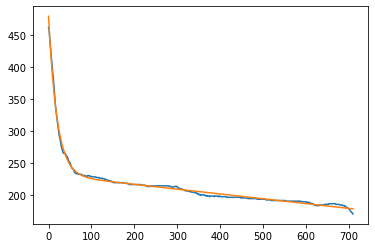

In [9]:
import json
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
athlete_id=3
athlete_name=['Erika Ackerlund','Johannes Weber','Jessica Allen','Eddie Anderson']
athlete_raw_path = "../problem/data/raw/athletes/"+athlete_name[athlete_id]+".json"
with open(athlete_raw_path) as raw:
    athelete_raw=json.load(raw)
watts=pd.DataFrame([x[2] for x in athelete_raw['cp_data']])
func=lambda x,m,n,k,l: m*(n**x)+k*x+l
p_est, err_est =curve_fit(func,watts.index,watts[0])
print(p_est)
plt.plot(watts.index,watts[0])
plt.plot(watts.index,func(watts[0].index,*p_est))
plt.savefig('../problem/data/athletes/'+athlete_name[athlete_id]+'.svg',format='svg')